## Part 1: Convolution Forward Pass on LeNet 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy import ndimage
import math

In [2]:
img=Image.open("images/img_50.jpg")
img=img.resize((32,32))
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'images/img_50.jpg'

In [3]:
inp=np.array(img)
inp=inp.reshape(32,32,1)
inp.shape

(32, 32, 1)

In [4]:
def relu(x):
    x[x < 0] = 0
    return x

def sigmoid(x):  
    return 1/(1+np.exp(-x))

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [5]:
def convo_each_step(Previous_slice, Wt, bias):
    temp = np.multiply(Previous_slice,Wt)
    Z = np.sum(temp)
    Z = Z+(bias)
    Z = relu(Z)
    return Z

In [6]:
Wt=np.random.randn(5,5,1,6)
bias=np.random.randn(1,1,1,6)
hyperparams = {"pad" : 0,
               "stride": 1}

In [7]:
def convo_forwardprop(IMAGE, Wt, bias, hyperparams):
    (ht_p, width_p, channels_p) = IMAGE.shape
    (f, f, channels_p, channels) = Wt.shape
    
    stride = hyperparams["stride"]
    pad = hyperparams["pad"]
    
    ht = int((ht_p-f)/stride)+1
    width = int((width_p-f)/stride)+1
    
    Z =np.zeros((ht,width,channels))
                            
    for h in range(ht):             
        for w in range(width):                      
            for c in range(channels):                   
                vStart = h*stride
                vEnd = vStart+f
                hStart = w*stride
                hEnd = hStart+f
                a_slice_prev = IMAGE[vStart:vEnd,hStart:hEnd,:]
                Z[h, w, c] = convo_each_step(a_slice_prev,Wt[:,:,:,c],bias[:,:,:,c])

    return Z

In [8]:
def pooling_forwardprop(IMAGE,hyperparams,f_size,mode = "max"):
    (ht_p, width_p, channels_p) = IMAGE.shape
    
    stride = hyperparams["stride"]
    
    ht = int((ht_p-f_size)/stride)+1
    width = int((width_p-f_size)/stride)+1
    channels=channels_p
    
    Z=np.zeros((ht,width,channels))             
    
    for h in range(ht):             
        for w in range(width):                      
            for c in range(channels):            
                vStart = h*stride
                vEnd = vStart+f_size
                hStart = w*stride
                hEnd = hStart+f_size
                a_slice_prev =IMAGE[vStart:vEnd,hStart:hEnd,c]
                if mode == "max":
                    Z[h, w, c] = np.max(a_slice_prev)
    
    return Z

In [9]:
Z=convo_forwardprop(inp, Wt, bias, hyperparams)

In [10]:
Z.shape

(28, 28, 6)

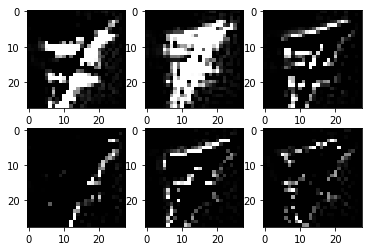

In [11]:
fig, axes = plt.subplots(2,3)
for i in range(3):
    x=Image.fromarray(Z[:,:,i])
    axes[0,i].imshow(x)
#     plt.imshow(x)
for i in range(3):
    x=Image.fromarray(Z[:,:,i+3])
    axes[1,i].imshow(x)

In [12]:
inp1=Z
inp1.shape

(28, 28, 6)

In [13]:
Wt=np.random.randn(2,2,6,6)
bias=np.random.rand(1,1,1,6)
hyperparams = {"pad" : 0,
               "stride": 2}
Z=pooling_forwardprop(inp1,hyperparams,2)

In [14]:
Z.shape

(14, 14, 6)

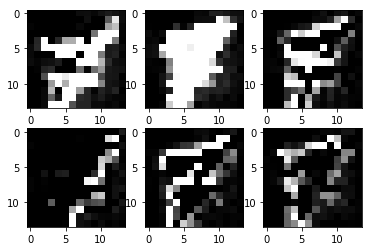

In [15]:
fig, axes = plt.subplots(2,3)
for i in range(3):
    x=Image.fromarray(Z[:,:,i])
    axes[0,i].imshow(x)
#     plt.imshow(x)
for i in range(3):
    x=Image.fromarray(Z[:,:,i+3])
    axes[1,i].imshow(x)

In [16]:
inp2=Z
inp2.shape

(14, 14, 6)

In [17]:
Wt=np.random.randn(5,5,6,16)
bias=np.random.rand(1,1,1,16)
hyperparams = {"pad" : 0,
               "stride": 1}
Z= convo_forwardprop(inp2, Wt, bias, hyperparams)
Z.shape

(10, 10, 16)

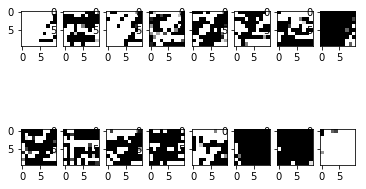

In [18]:
fig, axes = plt.subplots(2,8)
for i in range(8):
    x=Image.fromarray(Z[:,:,i])
    axes[0,i].imshow(x)
#     plt.imshow(x)
for i in range(8):
    x=Image.fromarray(Z[:,:,i+8])
    axes[1,i].imshow(x)

In [19]:
inp3=Z
inp3.shape

(10, 10, 16)

In [20]:
Wt=np.random.randn(2,2,16,16)
bias=np.random.rand(1,1,1,16)
hyperparams = {"pad" : 0,
               "stride": 2}
Z= pooling_forwardprop(inp3, hyperparams, 2)
Z.shape

(5, 5, 16)

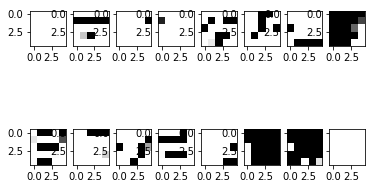

In [21]:
fig, axes = plt.subplots(2,8)
for i in range(8):
    x=Image.fromarray(Z[:,:,i])
    axes[0,i].imshow(x)
#     plt.imshow(x)
for i in range(8):
    x=Image.fromarray(Z[:,:,i+8])
    axes[1,i].imshow(x)

In [22]:
inp4=Z
inp4.shape

(5, 5, 16)

In [23]:
Wt=np.random.randn(5,5,16,120)
bias=np.random.rand(1,1,1,120)
hyperparams = {"pad" : 0,
               "stride": 1}
Z= convo_forwardprop(inp4, Wt, bias, hyperparams)
Z.shape

(1, 1, 120)

In [24]:
# fig, axes = plt.subplots(2,60)
# for i in range(60):
#     x=Image.fromarray(Z[:,:,i])
#     axes[0,i].imshow(x)
# for i in range(60):
#     x=Image.fromarray(Z[:,:,i+60])
#     axes[1,i].imshow(x)

In [25]:
Act_c3=Z.reshape(120,1)
WH=np.random.randn(120,84)*0.001
ZH=np.dot(Act_c3.T,WH)
AH2=relu(ZH)
AH2=AH2.T
AH2.shape

(84, 1)

In [26]:
WH2=np.random.randn(84,10)*0.001
ZH2=np.dot(AH2.T,WH2)
AHfinal=relu(ZH2)
AHfinal.T.shape

(10, 1)

In [27]:
np.argmax(AHfinal.T)

2

In [28]:
# Wt_pool2=np.random.randn(400,120)*0.001
# Z_pool2=np.dot(Act_pool2,Wt_pool2)
# Z_pool2=Z_pool2.T
# Z_pool2.shape

In [29]:
# AH=relu(Z_pool2)
# WH=np.random.randn(120,84)*0.001
# ZH=np.dot(AH.T,WH)
# AH2=relu(ZH)
# AH2=AH2.T
# AH2.shape

In [30]:
# WH2=np.random.randn(10,84)*0.001
# ZH2=np.dot(WH2,AH2)
# AHfinal=relu(ZH2)
# AHfinal.shape

In [31]:
# AHfinal

## Part 2:
#### 1. Number of parameters in 1st convolution layer = ( Height * Width + Bias ) * No.of Channels = (5 * 5 * 1 + 1) * 6 = 156
#### 2. Number of parameters in pooling operation = 0
#### 3.  No. of parameters in following:- <br>
#### a) Conv 1 = 156 <br>   &nbsp; &nbsp; Conv 2 = (5 * 5 * 6 + 1) * 16 = 2416 
#### b) Pool = 0 <br>
#### c) Fully connected layer (FC) = (84 + 1) * 120 = 10,200 <br>
#### d) Activation Functions = 84 <br>
####  &nbsp; &nbsp; So, Fully connected layer contains most number of parameters.
#### 4. Fully connected layers at the end consume most amount of memory as their weight and activations matrix is more complex than convolutional layers feature map matrix.